# ¿Cuál es un mejor plan?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de los planes genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

## Inicialización

Se agregan las librerías necesarias para este proyecto:

In [1]:
# Cargar todas las librerías
import pandas as pd
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt

## Cargar los datos

Se cargan las tablas con los datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
try:
    users = pd.read_csv('megaline_users.csv')
    calls = pd.read_csv('megaline_calls.csv')
    internet = pd.read_csv('megaline_internet.csv')
    messages = pd.read_csv('megaline_messages.csv')
    plans = pd.read_csv('megaline_plans.csv')
except:
    users = pd.read_csv('/datasets/megaline_users.csv')
    calls = pd.read_csv('/datasets/megaline_calls.csv')
    internet = pd.read_csv('/datasets/megaline_internet.csv')
    messages = pd.read_csv('/datasets/megaline_messages.csv')
    plans = pd.read_csv('/datasets/megaline_plans.csv')
    


## Preparar los datos

In [3]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [4]:
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [5]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [6]:
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [7]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [8]:
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


## Planes

In [9]:
# Imprime la información general/resumen sobre el DataFrame de los planes
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [10]:
# Imprime una muestra de los datos para los planes
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


El DataFrame `plans` muestra solo lo que incluye cada uno de los tipos de planes, *surf* y *ultimate*, no se muestran problemas visibles ya que solo es un DataFrame informativo.

## Corregir los datos

In [11]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [12]:
users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


In [13]:
calls['call_date'] = pd.to_datetime(calls['call_date'],format='%Y-%m-%d')

In [14]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [15]:
internet['session_date'] = pd.to_datetime(internet['session_date'],format='%Y-%m-%d')

In [16]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [17]:
messages['message_date'] = pd.to_datetime(messages['message_date'],format='%Y-%m-%d')

In [18]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


## Enriquecer los datos

Se van a crear las columnas con el mes en que se realizaron las llamadas, se enviaron mensajes o se ingreso a internet por medio del plan de datos, esto para agrupar los datos y sacar las tarifas al mes con los consumos de cada usuario.

In [19]:
calls['month_of_consume'] = calls['call_date'].dt.month
calls.head()

,id,user_id,call_date,duration,month_of_consume
0,1000_93,1000,2018-12-27,8.52,12
1,1000_145,1000,2018-12-27,13.66,12
2,1000_247,1000,2018-12-27,14.48,12
3,1000_309,1000,2018-12-28,5.76,12
4,1000_380,1000,2018-12-30,4.22,12


In [20]:
internet['month_of_consume'] = internet['session_date'].dt.month
internet.head()

,id,user_id,session_date,mb_used,month_of_consume
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12


In [21]:
messages['month_of_consume'] = messages['message_date'].dt.month
messages.head()

,id,user_id,message_date,month_of_consume
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


## Usuarios

In [22]:
# Imprime la información general/resumen sobre el DataFrame de los usuarios
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [23]:
# Imprime una muestra de los datos para los usuarios
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


La columna *churn_date* y *reg_date* se deben cambiar de tipo de datos a `datetime` para poder manejar el DataFrame

### Corregir datos

In [24]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

### Enriquecer datos

Se creará la columna con el mes en el que el usuario se registro

In [25]:
users['month_of_registration'] = users['reg_date'].dt.month
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month_of_registration
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,12
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,8
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,10
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,1
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,5


In [26]:
def info_data(data):
    data.info()
    print()
    print(data.head())

## Llamadas

In [27]:
# Imprime la información/resumen general sobre el DataFrame de las llamadas
info_data(calls)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                137735 non-null  object        
 1   user_id           137735 non-null  int64         
 2   call_date         137735 non-null  datetime64[ns]
 3   duration          137735 non-null  float64       
 4   month_of_consume  137735 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.3+ MB

         id  user_id  call_date  duration  month_of_consume
0   1000_93     1000 2018-12-27      8.52                12
1  1000_145     1000 2018-12-27     13.66                12
2  1000_247     1000 2018-12-27     14.48                12
3  1000_309     1000 2018-12-28      5.76                12
4  1000_380     1000 2018-12-30      4.22                12


En el DataFrame no tiene valores ausentes, los tipos de datos ya se cambiaron con los correctos, por lo que no hay problemas con los datos

## Mensajes

In [28]:
info_data(messages)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                76051 non-null  object        
 1   user_id           76051 non-null  int64         
 2   message_date      76051 non-null  datetime64[ns]
 3   month_of_consume  76051 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 2.3+ MB

         id  user_id message_date  month_of_consume
0  1000_125     1000   2018-12-27                12
1  1000_160     1000   2018-12-31                12
2  1000_223     1000   2018-12-31                12
3  1000_251     1000   2018-12-27                12
4  1000_255     1000   2018-12-26                12


## Internet

In [29]:
info_data(internet)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                104825 non-null  object        
 1   user_id           104825 non-null  int64         
 2   session_date      104825 non-null  datetime64[ns]
 3   mb_used           104825 non-null  float64       
 4   month_of_consume  104825 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 4.0+ MB

         id  user_id session_date  mb_used  month_of_consume
0   1000_13     1000   2018-12-29    89.86                12
1  1000_204     1000   2018-12-31     0.00                12
2  1000_379     1000   2018-12-28   660.40                12
3  1000_413     1000   2018-12-26   270.99                12
4  1000_442     1000   2018-12-27   880.22                12


## Estudiar las condiciones del plan

In [30]:
# Imprime las condiciones del plan y asegúrate de que te resulten claros
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Agregar datos por usuario

In [31]:
# Calcula el número de llamadas hechas por cada usuario por mes. Guarda el resultado.
no_calls = calls.pivot_table(index=['user_id','month_of_consume'],values='duration',aggfunc='count')
no_calls

duration
user_id month_of_consume          
1000    12                      16
1001    8                       27
        9                       49
        10                      65
        11                      64
...                            ...
1498    12                      39
1499    9                       41
        10                      53
        11                      45
        12                      65

[2258 rows x 1 columns]

In [32]:
# Calcula la cantidad de minutos que usó cada usuario por mes. Guarda el resultado.
calls_pvt = calls.pivot_table(index=['user_id','month_of_consume'],values='duration',aggfunc='sum')
calls_pvt.columns =['calls_duration_per_month']
calls_pvt

calls_duration_per_month
user_id month_of_consume                          
1000    12                                  116.83
1001    8                                   171.14
        9                                   297.69
        10                                  374.11
        11                                  404.59
...                                            ...
1498    12                                  324.77
1499    9                                   330.37
        10                                  363.28
        11                                  288.56
        12                                  468.10

[2258 rows x 1 columns]

In [33]:
# Calcula el número de mensajes enviados por cada usuario por mes. Guarda el resultado.
messages_pvt = messages.pivot_table(index=['user_id','month_of_consume'],values='message_date',aggfunc='count')
messages_pvt.columns = ['messages_per_month']
messages_pvt

messages_per_month
user_id month_of_consume                    
1000    12                                11
1001    8                                 30
        9                                 44
        10                                53
        11                                36
...                                      ...
1496    9                                 21
        10                                18
        11                                13
        12                                11
1497    12                                50

[1806 rows x 1 columns]

In [34]:
# Calcula el volumen del trafico de internet usado por cada usuario por mes. Guarda el resultado.
internet_pvt = internet.pivot_table(index=['user_id','month_of_consume'],values='mb_used',aggfunc='sum')
internet_pvt.columns = ['mb_per_month']
internet_pvt

mb_per_month
user_id month_of_consume              
1000    12                     1901.47
1001    8                      6919.15
        9                     13314.82
        10                    22330.49
        11                    18504.30
...                                ...
1498    12                    23137.69
1499    9                     12984.76
        10                    19492.43
        11                    16813.83
        12                    22059.21

[2277 rows x 1 columns]

In [35]:
# Combina los datos para las llamadas, minutos, mensajes e internet con base en el user_id y el mes
joined = calls_pvt.join(messages_pvt,on=['user_id','month_of_consume'])
joined = joined.join(internet_pvt,on=['user_id','month_of_consume'])
joined.reset_index().set_index('user_id')

,month_of_consume,calls_duration_per_month,messages_per_month,mb_per_month
user_id,,,,
1000,12,116.83,11.0,1901.47
1001,8,171.14,30.0,6919.15
1001,9,297.69,44.0,13314.82
1001,10,374.11,53.0,22330.49
1001,11,404.59,36.0,18504.30
...,...,...,...,...
1498,12,324.77,NaN,23137.69
1499,9,330.37,NaN,12984.76
1499,10,363.28,NaN,19492.43


In [36]:
# Añade la información del plan
users_consumption = joined.join(users.set_index('user_id')['plan'],on='user_id')
users_consumption = users_consumption.reset_index().set_index('user_id')

In [37]:
users_consumption

,month_of_consume,calls_duration_per_month,messages_per_month,mb_per_month,plan
user_id,,,,,
1000,12,116.83,11.0,1901.47,ultimate
1001,8,171.14,30.0,6919.15,surf
1001,9,297.69,44.0,13314.82,surf
1001,10,374.11,53.0,22330.49,surf
1001,11,404.59,36.0,18504.30,surf
...,...,...,...,...,...
1498,12,324.77,NaN,23137.69,surf
1499,9,330.37,NaN,12984.76,surf
1499,10,363.28,NaN,19492.43,surf


In [38]:
users_consumption = users_consumption.reset_index().set_index('plan').join(plans.set_index('plan_name')).reset_index()
users_consumption

,index,user_id,month_of_consume,calls_duration_per_month,messages_per_month,mb_per_month,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,surf,1001,8,171.14,30.0,6919.15,50,15360,500,20,10,0.03,0.03
1,surf,1001,9,297.69,44.0,13314.82,50,15360,500,20,10,0.03,0.03
2,surf,1001,10,374.11,53.0,22330.49,50,15360,500,20,10,0.03,0.03
3,surf,1001,11,404.59,36.0,18504.30,50,15360,500,20,10,0.03,0.03
4,surf,1001,12,392.93,44.0,19369.18,50,15360,500,20,10,0.03,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2253,ultimate,1493,9,505.13,NaN,14991.17,1000,30720,3000,70,7,0.01,0.01
2254,ultimate,1493,10,424.25,NaN,16329.57,1000,30720,3000,70,7,0.01,0.01
2255,ultimate,1493,11,472.15,NaN,15630.78,1000,30720,3000,70,7,0.01,0.01
2256,ultimate,1493,12,446.28,NaN,15289.09,1000,30720,3000,70,7,0.01,0.01


In [39]:
#!pip install pandas==1.5.0

In [40]:
#users_consumption = users_consumption.reset_index().set_index('plan').join(plans.set_index('plan_name')).reset_index()
#users_consumption

In [41]:
# Calcula el ingreso mensual para cada usuario
users_consumption['minutes_used'] = users_consumption['calls_duration_per_month']-users_consumption['minutes_included']
users_consumption['messages_sent'] = users_consumption['messages_per_month'] - users_consumption['messages_included']
users_consumption['gb_used'] = (users_consumption['mb_per_month'] - users_consumption['mb_per_month_included']) / 1024
users_consumption

,index,user_id,month_of_consume,calls_duration_per_month,messages_per_month,mb_per_month,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,minutes_used,messages_sent,gb_used
0,surf,1001,8,171.14,30.0,6919.15,50,15360,500,20,10,0.03,0.03,-328.86,-20.0,-8.243018
1,surf,1001,9,297.69,44.0,13314.82,50,15360,500,20,10,0.03,0.03,-202.31,-6.0,-1.997246
2,surf,1001,10,374.11,53.0,22330.49,50,15360,500,20,10,0.03,0.03,-125.89,3.0,6.807119
3,surf,1001,11,404.59,36.0,18504.30,50,15360,500,20,10,0.03,0.03,-95.41,-14.0,3.070605
4,surf,1001,12,392.93,44.0,19369.18,50,15360,500,20,10,0.03,0.03,-107.07,-6.0,3.915215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2253,ultimate,1493,9,505.13,NaN,14991.17,1000,30720,3000,70,7,0.01,0.01,-2494.87,NaN,-15.360186
2254,ultimate,1493,10,424.25,NaN,16329.57,1000,30720,3000,70,7,0.01,0.01,-2575.75,NaN,-14.053154
2255,ultimate,1493,11,472.15,NaN,15630.78,1000,30720,3000,70,7,0.01,0.01,-2527.85,NaN,-14.735566
2256,ultimate,1493,12,446.28,NaN,15289.09,1000,30720,3000,70,7,0.01,0.01,-2553.72,NaN,-15.069248


In [42]:
users_consumption['messages_sent'] = users_consumption['messages_sent'].fillna(0)
users_consumption

,index,user_id,month_of_consume,calls_duration_per_month,messages_per_month,mb_per_month,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,minutes_used,messages_sent,gb_used
0,surf,1001,8,171.14,30.0,6919.15,50,15360,500,20,10,0.03,0.03,-328.86,-20.0,-8.243018
1,surf,1001,9,297.69,44.0,13314.82,50,15360,500,20,10,0.03,0.03,-202.31,-6.0,-1.997246
2,surf,1001,10,374.11,53.0,22330.49,50,15360,500,20,10,0.03,0.03,-125.89,3.0,6.807119
3,surf,1001,11,404.59,36.0,18504.30,50,15360,500,20,10,0.03,0.03,-95.41,-14.0,3.070605
4,surf,1001,12,392.93,44.0,19369.18,50,15360,500,20,10,0.03,0.03,-107.07,-6.0,3.915215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2253,ultimate,1493,9,505.13,NaN,14991.17,1000,30720,3000,70,7,0.01,0.01,-2494.87,0.0,-15.360186
2254,ultimate,1493,10,424.25,NaN,16329.57,1000,30720,3000,70,7,0.01,0.01,-2575.75,0.0,-14.053154
2255,ultimate,1493,11,472.15,NaN,15630.78,1000,30720,3000,70,7,0.01,0.01,-2527.85,0.0,-14.735566
2256,ultimate,1493,12,446.28,NaN,15289.09,1000,30720,3000,70,7,0.01,0.01,-2553.72,0.0,-15.069248


Primero se generaron las columnas con la diferencia entre lo consumido y lo incluido de cada plan por usuario por mes. Se va a trabajar en estas columnas para calcular el monto por usuario por mes, para ellos los valores negativos de la diferencia se van a cambiar a 0, ya que no se consumieron los minutos, mensajes o mb incluidos en su plan ese mes

In [43]:
consumos=['minutes_used','messages_sent','gb_used']

def reemplazo(data):
    for col in consumos:
        for value in data[col]:
            if value <=0:
                data[col].replace(value,0,inplace=True)

In [47]:
reemplazo(users_consumption)
users_consumption

,index,user_id,month_of_consume,calls_duration_per_month,messages_per_month,mb_per_month,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,minutes_used,messages_sent,gb_used
0,surf,1001,8,171.14,30.0,6919.15,50,15360,500,20,10,0.03,0.03,0.0,0.0,0.000000
1,surf,1001,9,297.69,44.0,13314.82,50,15360,500,20,10,0.03,0.03,0.0,0.0,0.000000
2,surf,1001,10,374.11,53.0,22330.49,50,15360,500,20,10,0.03,0.03,0.0,3.0,6.807119
3,surf,1001,11,404.59,36.0,18504.30,50,15360,500,20,10,0.03,0.03,0.0,0.0,3.070605
4,surf,1001,12,392.93,44.0,19369.18,50,15360,500,20,10,0.03,0.03,0.0,0.0,3.915215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2253,ultimate,1493,9,505.13,NaN,14991.17,1000,30720,3000,70,7,0.01,0.01,0.0,0.0,0.000000
2254,ultimate,1493,10,424.25,NaN,16329.57,1000,30720,3000,70,7,0.01,0.01,0.0,0.0,0.000000
2255,ultimate,1493,11,472.15,NaN,15630.78,1000,30720,3000,70,7,0.01,0.01,0.0,0.0,0.000000
2256,ultimate,1493,12,446.28,NaN,15289.09,1000,30720,3000,70,7,0.01,0.01,0.0,0.0,0.000000


Se calculan los costos extras por llamadas, mensajes y mb

Se toman las columnas *plan*, *month_of_cons*, *minutes_used*, *messages_sent*, *mb_used* para crear un nuevo DataFrame y calcular el ingreso por usuario por mes

In [48]:
users_consumption = users_consumption.rename(columns={'index':'plan'})
users_consumption

,plan,user_id,month_of_consume,calls_duration_per_month,messages_per_month,mb_per_month,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,minutes_used,messages_sent,gb_used
0,surf,1001,8,171.14,30.0,6919.15,50,15360,500,20,10,0.03,0.03,0.0,0.0,0.000000
1,surf,1001,9,297.69,44.0,13314.82,50,15360,500,20,10,0.03,0.03,0.0,0.0,0.000000
2,surf,1001,10,374.11,53.0,22330.49,50,15360,500,20,10,0.03,0.03,0.0,3.0,6.807119
3,surf,1001,11,404.59,36.0,18504.30,50,15360,500,20,10,0.03,0.03,0.0,0.0,3.070605
4,surf,1001,12,392.93,44.0,19369.18,50,15360,500,20,10,0.03,0.03,0.0,0.0,3.915215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2253,ultimate,1493,9,505.13,NaN,14991.17,1000,30720,3000,70,7,0.01,0.01,0.0,0.0,0.000000
2254,ultimate,1493,10,424.25,NaN,16329.57,1000,30720,3000,70,7,0.01,0.01,0.0,0.0,0.000000
2255,ultimate,1493,11,472.15,NaN,15630.78,1000,30720,3000,70,7,0.01,0.01,0.0,0.0,0.000000
2256,ultimate,1493,12,446.28,NaN,15289.09,1000,30720,3000,70,7,0.01,0.01,0.0,0.0,0.000000


Se van a redondear los valores de *minutes_used* y *mb_used* para calcular el ingreso total por mes por usuario.

In [49]:
users_consumption['minutes_used'] = users_consumption['minutes_used'].apply(np.ceil)
users_consumption['gb_used'] = users_consumption['gb_used'].apply(np.ceil)
users_consumption[['minutes_used','gb_used']].describe()

,minutes_used,gb_used
count,2258.000000,2243.000000
mean,34.118689,2.723584
std,94.710136,4.735964
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,4.000000
max,932.000000,55.000000


In [50]:
users_consumption['minutes_income'] = users_consumption['minutes_used'] * users_consumption['usd_per_minute']
users_consumption['messages_income'] = users_consumption['messages_sent'] * users_consumption['usd_per_message']
users_consumption['gb_income'] = users_consumption['gb_used'] * users_consumption['usd_per_gb']
users_consumption.describe()

,user_id,month_of_consume,calls_duration_per_month,messages_per_month,mb_per_month,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,minutes_used,messages_sent,gb_used,minutes_income,messages_income,gb_income
count,2258.000000,2258.000000,2258.000000,1773.000000,2243.000000,2258.000000,2258.000000,2258.000000,2258.000000,2258.000000,2258.000000,2258.000000,2258.000000,2258.000000,2243.000000,2258.000000,2258.000000,2243.000000
mean,1247.175819,9.167405,411.492586,42.095319,16861.598506,349.977857,20210.168291,1289.415412,35.788308,9.052702,0.023685,0.023685,34.118689,4.778122,2.723584,1.023561,0.143344,26.925546
std,143.344211,2.495785,219.290453,33.234773,7731.497852,441.677081,7141.221012,1162.308107,23.246162,1.394770,0.009298,0.009298,94.710136,16.511913,4.735964,2.841304,0.495357,47.068433
min,1000.000000,1.000000,0.000000,1.000000,92.310000,50.000000,15360.000000,500.000000,20.000000,7.000000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1122.000000,8.000000,258.075000,17.000000,12399.825000,50.000000,15360.000000,500.000000,20.000000,7.000000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1246.000000,10.000000,404.270000,34.000000,16908.690000,50.000000,15360.000000,500.000000,20.000000,10.000000,0.030000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1370.000000,11.000000,543.335000,59.000000,21001.870000,1000.000000,30720.000000,3000.000000,70.000000,10.000000,0.030000,0.030000,0.000000,0.000000,4.000000,0.000000,0.000000,40.000000
max,1499.000000,12.000000,1431.220000,266.000000,70931.590000,1000.000000,30720.000000,3000.000000,70.000000,10.000000,0.030000,0.030000,932.000000,216.000000,55.000000,27.960000,6.480000,550.000000


In [51]:
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [52]:
users_consumption['total_income'] = users_consumption['usd_monthly_pay'] + users_consumption['minutes_income'] + users_consumption['messages_income'] + users_consumption['gb_income']
users_consumption

,plan,user_id,month_of_consume,calls_duration_per_month,messages_per_month,mb_per_month,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,minutes_used,messages_sent,gb_used,minutes_income,messages_income,gb_income,total_income
0,surf,1001,8,171.14,30.0,6919.15,50,15360,500,20,10,0.03,0.03,0.0,0.0,0.0,0.0,0.00,0.0,20.00
1,surf,1001,9,297.69,44.0,13314.82,50,15360,500,20,10,0.03,0.03,0.0,0.0,0.0,0.0,0.00,0.0,20.00
2,surf,1001,10,374.11,53.0,22330.49,50,15360,500,20,10,0.03,0.03,0.0,3.0,7.0,0.0,0.09,70.0,90.09
3,surf,1001,11,404.59,36.0,18504.30,50,15360,500,20,10,0.03,0.03,0.0,0.0,4.0,0.0,0.00,40.0,60.00
4,surf,1001,12,392.93,44.0,19369.18,50,15360,500,20,10,0.03,0.03,0.0,0.0,4.0,0.0,0.00,40.0,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2253,ultimate,1493,9,505.13,NaN,14991.17,1000,30720,3000,70,7,0.01,0.01,0.0,0.0,0.0,0.0,0.00,0.0,70.00
2254,ultimate,1493,10,424.25,NaN,16329.57,1000,30720,3000,70,7,0.01,0.01,0.0,0.0,0.0,0.0,0.00,0.0,70.00
2255,ultimate,1493,11,472.15,NaN,15630.78,1000,30720,3000,70,7,0.01,0.01,0.0,0.0,0.0,0.0,0.00,0.0,70.00
2256,ultimate,1493,12,446.28,NaN,15289.09,1000,30720,3000,70,7,0.01,0.01,0.0,0.0,0.0,0.0,0.00,0.0,70.00


In [53]:
users_consumption.query("plan=='ultimate'").describe()

,user_id,month_of_consume,calls_duration_per_month,messages_per_month,mb_per_month,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,minutes_used,messages_sent,gb_used,minutes_income,messages_income,gb_income,total_income
count,713.000000,713.000000,713.000000,579.000000,713.000000,713.0,713.0,713.0,713.0,713.0,7.130000e+02,7.130000e+02,713.0,713.0,713.000000,713.0,713.0,713.000000,713.000000
mean,1253.628331,9.158485,410.180954,46.455959,17278.003731,1000.0,30720.0,3000.0,70.0,7.0,1.000000e-02,1.000000e-02,0.0,0.0,0.325386,0.0,0.0,2.277700,72.277700
std,151.037175,2.545952,224.745705,32.930135,7759.655167,0.0,0.0,0.0,0.0,0.0,1.735941e-18,1.735941e-18,0.0,0.0,1.621706,0.0,0.0,11.351942,11.351942
min,1000.000000,1.000000,0.000000,1.000000,290.060000,1000.0,30720.0,3000.0,70.0,7.0,1.000000e-02,1.000000e-02,0.0,0.0,0.000000,0.0,0.0,0.000000,70.000000
25%,1126.000000,8.000000,247.970000,21.000000,12707.180000,1000.0,30720.0,3000.0,70.0,7.0,1.000000e-02,1.000000e-02,0.0,0.0,0.000000,0.0,0.0,0.000000,70.000000
50%,1246.000000,10.000000,399.980000,41.000000,16866.450000,1000.0,30720.0,3000.0,70.0,7.0,1.000000e-02,1.000000e-02,0.0,0.0,0.000000,0.0,0.0,0.000000,70.000000
75%,1401.000000,11.000000,534.820000,66.000000,21003.900000,1000.0,30720.0,3000.0,70.0,7.0,1.000000e-02,1.000000e-02,0.0,0.0,0.000000,0.0,0.0,0.000000,70.000000
max,1497.000000,12.000000,1292.090000,166.000000,46595.330000,1000.0,30720.0,3000.0,70.0,7.0,1.000000e-02,1.000000e-02,0.0,0.0,16.000000,0.0,0.0,112.000000,182.000000


## Estudia el comportamiento del usuario

### Llamadas

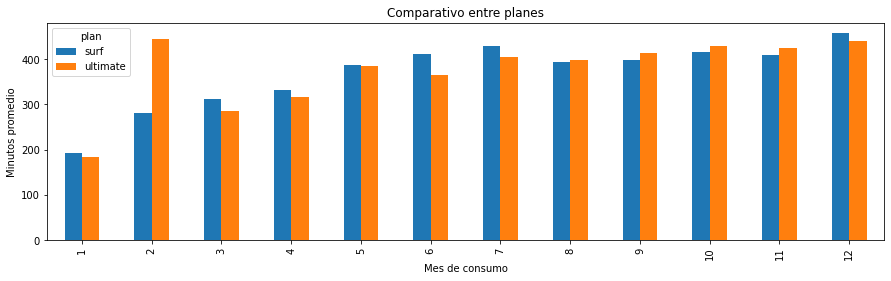

In [54]:
users_consumption.pivot_table(
index="month_of_consume",
columns="plan",
values="calls_duration_per_month",
aggfunc="mean").plot(kind="bar",figsize=(15,4),
                     title="Comparativo entre planes", xlabel='Mes de consumo',
                     ylabel="Minutos promedio")
plt.show()

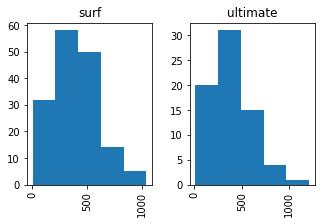

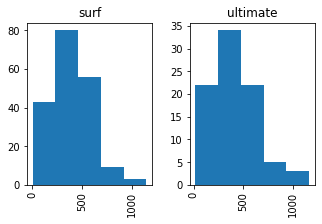

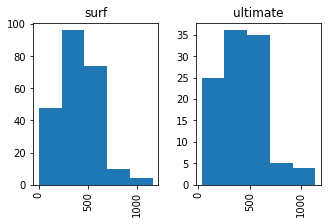

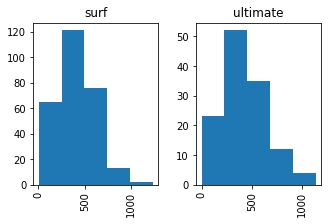

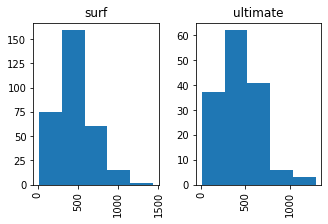

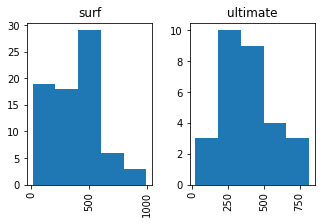

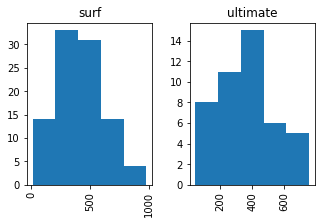

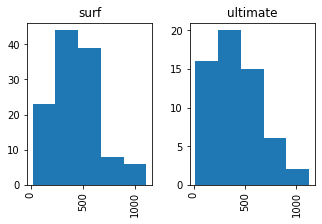

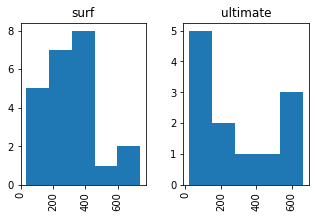

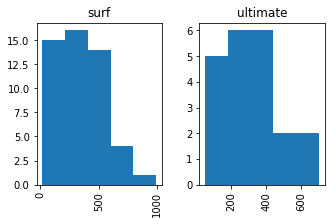

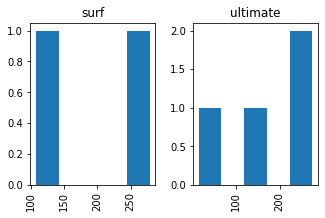

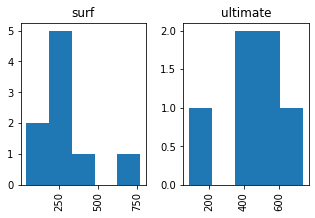

In [57]:
for i in users_consumption['month_of_consume'].unique():
    users_consumption[users_consumption['month_of_consume']==i].hist(bins=5,column='calls_duration_per_month',by='plan',figsize=(5,3))

In [58]:
# Calcula la media y la varianza de la duración mensual de llamadas.
print('Media de usuarios plan Surf:',users_consumption.query("plan=='surf'")['calls_duration_per_month'].mean())

print('Varianza de usuarios plan Surf:',np.var(users_consumption.query("plan=='surf'")['calls_duration_per_month']))

Media de usuarios plan Surf: 412.0978899676375
Varianza de usuarios plan Surf: 46970.83270700407


In [59]:
print('Media de usuarios plan Ultimate:',users_consumption.query("plan=='ultimate'")['calls_duration_per_month'].mean())

print('Varianza de usuarios plan Ultimate:',np.var(users_consumption.query("plan=='ultimate'")['calls_duration_per_month']))

Media de usuarios plan Ultimate: 410.18095371669006
Varianza de usuarios plan Ultimate: 50439.789304279766


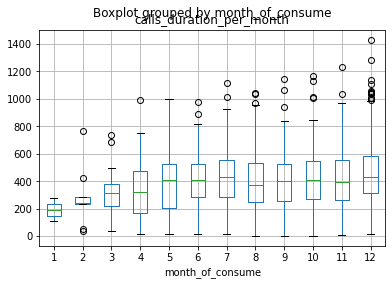

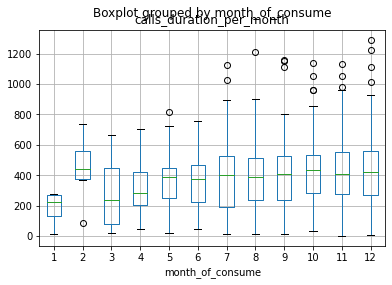

In [60]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
users_consumption.query("plan=='surf'").boxplot(column='calls_duration_per_month',by='month_of_consume',figsize=(6,4))
plt.show()

users_consumption.query("plan=='ultimate'").boxplot(column='calls_duration_per_month',by='month_of_consume',figsize=(6,4))
plt.show()

El comportamiento de los usuarios no difere tanto en cuanto al número de llamadas por mes que realizan, se nota un incremento de mediados de año hacia finales para ambos planes, los usuarios `Surf` muestran un comporatamiento a la alza más marcada que los usuarios `Ultimate`

### Mensajes

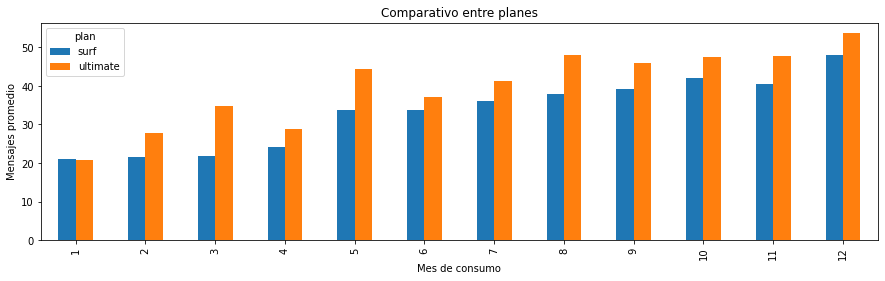

In [61]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
users_consumption.pivot_table(
index="month_of_consume",
columns="plan",
values="messages_per_month",
aggfunc="mean").plot(kind="bar",figsize=(15,4),
                     title="Comparativo entre planes", xlabel='Mes de consumo',
                     ylabel="Mensajes promedio")
plt.show()

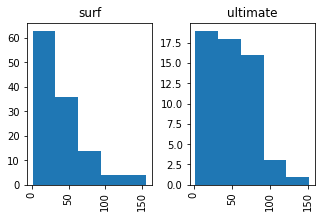

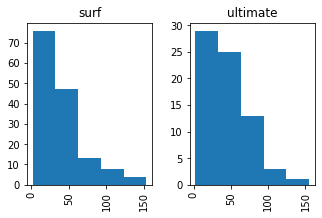

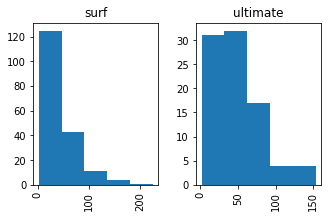

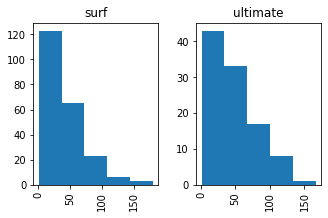

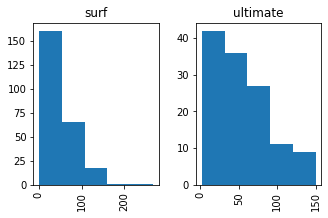

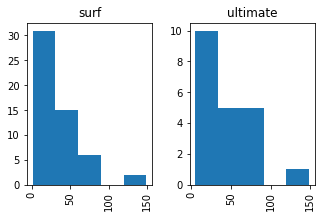

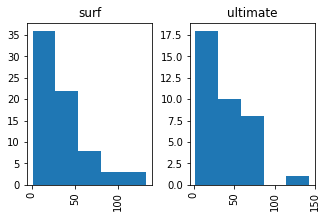

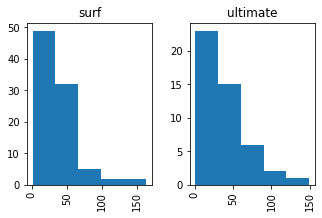

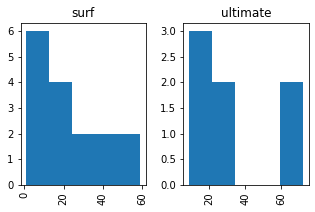

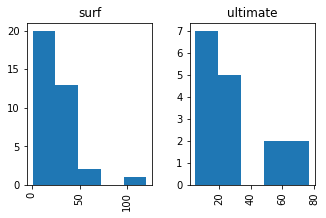

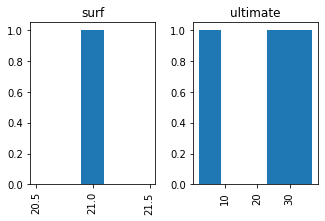

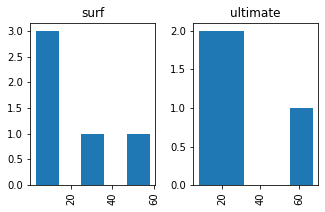

In [62]:
for i in users_consumption['month_of_consume'].unique():
    users_consumption[users_consumption['month_of_consume']==i].hist(bins=5,column='messages_per_month',by='plan',figsize=(5,3))

In [63]:
print('Media de usuarios plan Surf:',users_consumption.query("plan=='surf'")['messages_per_month'].mean())

print('Varianza de usuarios plan Surf:',np.var(users_consumption.query("plan=='surf'")['messages_per_month']))

Media de usuarios plan Surf: 39.98073701842546
Varianza de usuarios plan Surf: 1100.6152068269882


In [64]:
print('Media de usuarios plan Ultimate:',users_consumption.query("plan=='ultimate'")['messages_per_month'].mean())

print('Varianza de usuarios plan Ultimate:',np.var(users_consumption.query("plan=='ultimate'")['messages_per_month']))

Media de usuarios plan Ultimate: 46.4559585492228
Varianza de usuarios plan Ultimate: 1082.5209446338606


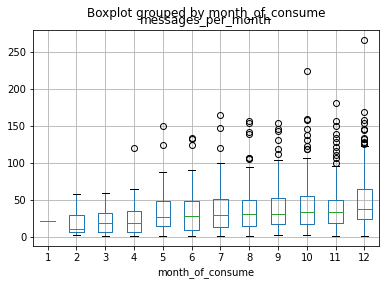

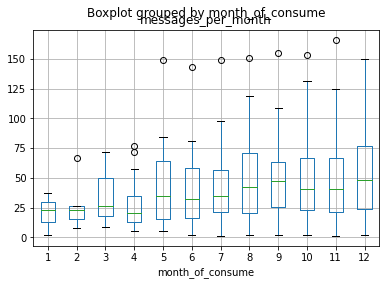

In [65]:
users_consumption.query("plan=='surf'").boxplot(column='messages_per_month',by='month_of_consume',figsize=(6,4))
plt.show()

users_consumption.query("plan=='ultimate'").boxplot(column='messages_per_month',by='month_of_consume',figsize=(6,4))
plt.show()

Los usuarios del plan `Ultimate` tienden a mandar más mensajes conforme avanza el año en comparación con `Surf` esto podría ser debido a la cantidad de mensajes que tienen incluidos en su plan.

### Internet

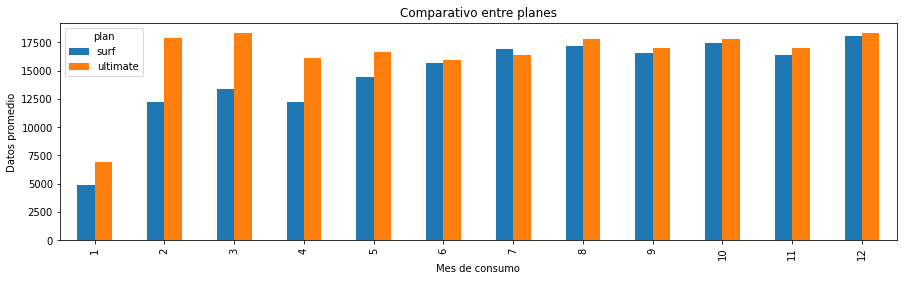

In [66]:
# Compara la cantidad de tráfico de internet consumido por usuarios por plan
users_consumption.pivot_table(
index="month_of_consume",
columns="plan",
values="mb_per_month",
aggfunc="mean").plot(kind="bar",figsize=(15,4),
                     title="Comparativo entre planes", xlabel='Mes de consumo',
                     ylabel="Datos promedio")
plt.show()

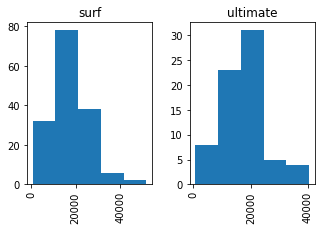

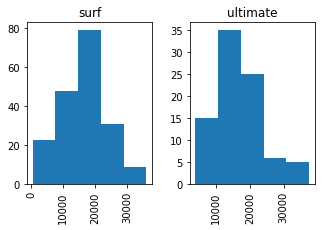

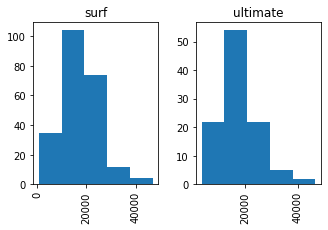

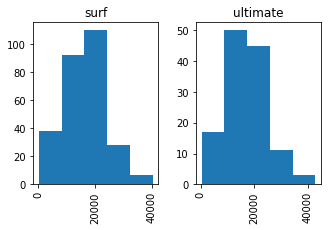

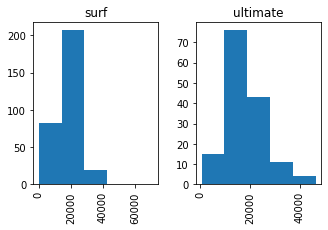

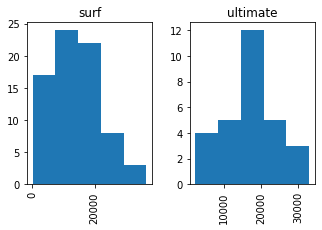

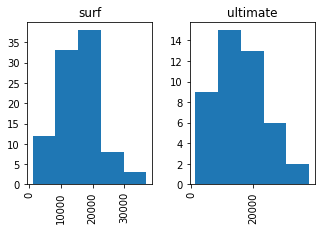

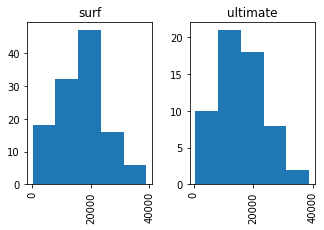

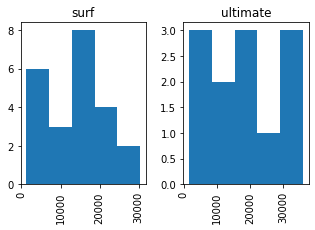

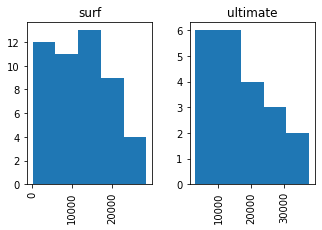

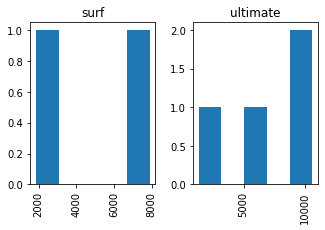

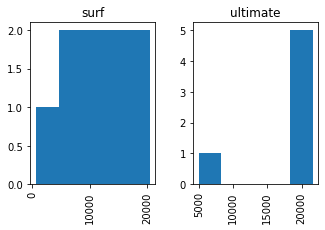

In [67]:
for i in users_consumption['month_of_consume'].unique():
    users_consumption[users_consumption['month_of_consume']==i].hist(bins=5,column='mb_per_month',by='plan',figsize=(5,3))

In [68]:
print('Media de usuarios plan Surf:',users_consumption.query("plan=='surf'")['mb_per_month'].mean())

print('Varianza de usuarios plan Surf:',np.var(users_consumption.query("plan=='surf'")['mb_per_month']))

Media de usuarios plan Surf: 16667.54822875817
Varianza de usuarios plan Surf: 59454615.16667129


In [69]:
print('Media de usuarios plan Ultimate:',users_consumption.query("plan=='ultimate'")['mb_per_month'].mean())

print('Varianza de usuarios plan Ultimate:',np.var(users_consumption.query("plan=='ultimate'")['mb_per_month']))

Media de usuarios plan Ultimate: 17278.00373071529
Varianza de usuarios plan Ultimate: 60127799.14878159


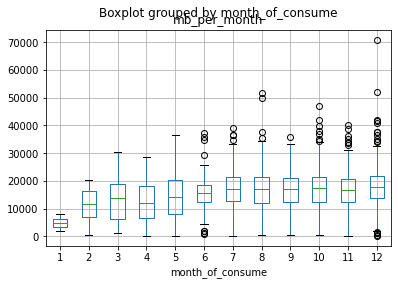

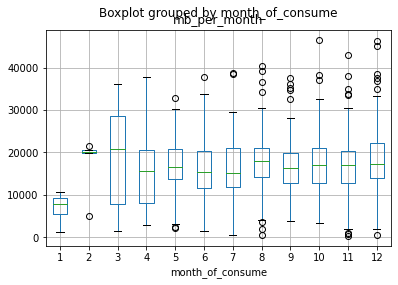

In [70]:
users_consumption.query("plan=='surf'").boxplot(column='mb_per_month',by='month_of_consume',figsize=(6,4))
plt.show()

users_consumption.query("plan=='ultimate'").boxplot(column='mb_per_month',by='month_of_consume',figsize=(6,4))
plt.show()

Los usuarios `Ultimate` utilizan mayor cantidad de datos con respecto al plan `Surf` siendo Marzo el mes con mayor consumo de los usuarios 

## Ingreso

In [ ]:
users_consumption.pivot_table(
index="month_of_consume",
columns="plan",
values="total_income",
aggfunc="mean").plot(kind="bar",figsize=(15,4),
                     title="Comparativo entre planes", xlabel='Mes de consumo',
                     ylabel="Ingreso total")
plt.show()

In [ ]:
for i in users_consumption['month_of_consume'].unique():
    users_consumption[users_consumption['month_of_consume']==i].hist(bins=5,column='total_income',by='plan',figsize=(5,3))

In [ ]:
print('Media de usuarios plan Surf:',users_consumption.query("plan=='surf'")['total_income'].mean())

print('Varianza de usuarios plan Surf:',np.var(users_consumption.query("plan=='surf'")['total_income']))

In [ ]:
print('Media de usuarios plan Ultimate:',users_consumption.query("plan=='ultimate'")['total_income'].mean())

print('Varianza de usuarios plan Ultimate:',np.var(users_consumption.query("plan=='ultimate'")['total_income']))

In [ ]:
users_consumption.query("plan=='surf'").boxplot(column='total_income',by='month_of_consume',figsize=(6,4))
plt.show()

users_consumption.query("plan=='ultimate'").boxplot(column='total_income',by='month_of_consume',figsize=(6,4))
plt.show()

Los usuarios `Ultimate` en comparación con el plan `Surf` tiene menor dispersión ya que no consumen todos los minutos, datos o mensajes que incluyen su plan, por lo que por la gráfica podemos decir que el plan `Surf` da mayores ingresos.

## Probar las hipótesis estadísticas.

In [ ]:
# Prueba las hipótesis
print('H0: Los ingresos promedio Surf y Ultimate son iguales')
print('H1: Los ingresos promedio Surf y Ultimate no son iguales')
alpha=0.05

In [ ]:
surf_users = users_consumption.query("plan=='surf'")['minutes_income']
ultimate_users = users_consumption.query("plan=='ultimate'")['minutes_income']

In [ ]:
results = st.ttest_ind(
surf_users,
ultimate_users,
equal_var=False)

print('p-value: ', results.pvalue)

In [ ]:
if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

Se realiza la prueba de hipótesis comparando el promedio de ingresos por llamadas en la ciudad NY-NJ contra el resto de las ciudades

In [ ]:
print('H0: El promedio de ingresos por llamada en NY-NJ es igual al resto de las ciudades')
print('H1: El promedio de ingresos por llamada en NY-NJ es diferente al resto de las ciudades')
alpha1=0.05

In [ ]:
users_NYNJ = users[users['city'].str.contains('NY-NJ')]
users_NYNJ_income = users_consumption.query('user_id in @users_NYNJ.user_id')

In [ ]:
users_othercity = users[users['city'].str.contains('NY-NJ')==False]
users_othercity_income = users_consumption.query('user_id in @users_othercity.user_id')

In [ ]:
# Prueba las hipótesis
results = st.ttest_ind(
users_NYNJ_income['minutes_income'],
users_othercity_income['minutes_income'],
equal_var=False)

print('p-value: ', results.pvalue)

In [ ]:
if (results.pvalue < alpha1):
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

## Conclusión general

En este análisis se buscó el comportamiento de los usuarios dependiendo del plan al que pertenecen.
Se unió la información de las diferentes fuentes de datos en un solo DataFrame con el que se trabajó, se eliminaron los valores ausentes cambiándolos por 0 en la columna de mensajes enviados. En diferentes momentos se agruparon los datos plan y mes de consumo.
Seguido de esto se graficaron los consumos de llamadas, mensajes y datos consumidos por los usuarios a los años, se realizaron los histogramas mostrando el comportamiento de la distribución de los datos. Así como el diagrama de caja en donde pudimos comparar los comportamientos, resultando graficamente que los usuarios que usan el plan `Surf` consumen más minutos, mensajes y datos extras al mes, esto sigue la lógica ya que los usuarios del plan `Ultimate` no terminan por lo regular lo que se incluye en su plan.
En las pruebas de hipótesis utilizamos el ingreso por minutos extras dependiendo el plan. Se fijo un valor alfa o de significancia del *5%*, con esto encontramos que los ingresos por plan no son iguales, y encontrando que los ingresos del plan `Surf` son mayores al plan `Ultimate` esto debido al valor *p* calculado.
La siguiente prueba fue filtrando los usuarios que se encuentran en NY-NJ y comparando con el resto de los usuarios que no pertenecen a estas ciudades. De ahí encontramos que el promedio de ingresos de la ciudad de NY-NJ es igual al promedio de las demás ciudades.